# Introducion :

<span style='background:yellow'> 

Hello Everyone!!
    
I hope everyone is doing well. I am little bit late in contribution to COVID19, But i will make sure this notebook will be worth to some extent. I am going to analyze COVID19 for India only in my first notebook, Later i will cover more!! Thank you for being here, Happy Reading !! :)

### COVID19:

<img src="https://eyewire.news/wp-content/uploads/sites/2/2020/03/banner-2.png" width="500" height="300">


Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment.


### HOW IT SPREADS?
The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.
You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

### To prevent the spread of COVID-19:

* Clean your hands often. Use soap and water, or an alcohol-based hand rub.

* Maintain a safe distance from anyone who is coughing or sneezing.

* Don’t touch your eyes, nose or mouth.

* Cover your nose and mouth with your bent elbow or a tissue when you cough or sneeze.

* Stay home if you feel unwell.

* If you have a fever, a cough, and difficulty breathing, seek medical attention. Call in advance.

* Follow the directions of your local health authority.

**Avoiding unneeded visits to medical facilities allows healthcare systems to operate more effectively, therefore protecting you and others.**

In [85]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
cf.go_offline()

In [87]:
covid19Personal = pd.read_csv('../input/covid19-india/covidIndiaSimple.csv')
covid19Personal.drop('Unnamed: 0',axis = 1,inplace =True)
covid19Personal.drop([32,33,34],inplace=True)
covid19Personal['Total Confirmed cases']=covid19Personal['Total Confirmed cases'].astype('int')
covid19Personal['Cured']=covid19Personal['Cured'].astype('int')
covid19Personal['Death']=covid19Personal['Death'].astype('int')
covid19Personal.head()

,State,Total Confirmed cases,Cured,Death
0,Andaman and Nicobar Islands,33,15,0
1,Andhra Pradesh,1332,287,31
2,Arunachal Pradesh,1,1,0
3,Assam,38,29,1
4,Bihar,392,65,2


In [88]:
covid_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv',index_col=1,parse_dates=True)
covid_df.drop(['Last Update','SNo'],axis = 1, inplace = True)
covid_df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [89]:
covid_india = covid_df[covid_df['Country/Region']=='India']
covid_india.index.freq = 'D'
covid_india.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-30,NaN,India,1.0,0.0,0.0
2020-01-31,NaN,India,1.0,0.0,0.0
2020-02-01,NaN,India,1.0,0.0,0.0
2020-02-02,NaN,India,2.0,0.0,0.0
2020-02-03,NaN,India,3.0,0.0,0.0


In [90]:
covid_indStates = pd.read_csv('../input/covid19-in-india/covid_19_india.csv',index_col=1,parse_dates=True)
covid_indStates.drop(['Sno','Time'],axis = 1, inplace = True)
covid_indStates.head()

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,
2020-01-30,Kerala,1,0,0,0,1
2020-01-31,Kerala,1,0,0,0,1
2020-01-02,Kerala,2,0,0,0,2
2020-02-02,Kerala,3,0,0,0,3
2020-03-02,Kerala,3,0,0,0,3


# EDA :

Let us look at some EDA, I love to find statistical evidence from data. I will try to extract information here also!!

In [91]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_india.index, y=covid_india['Confirmed'], name='Confirmed',
                         line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x=covid_india.index, y=covid_india['Recovered'], name='Recovered',
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=covid_india.index, y=covid_india['Deaths'], name='Deaths',
                         line=dict(color='firebrick', width=4)))

fig.update_layout(
    title='Corona Virus Trend in India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig.show()

In [92]:
covid_india[['Confirmed']].iplot(kind='bar',color=['blue'],title = 'Confirmed Cases in India',
                                 yTitle = 'Cases Per Day',xTitle='Day')

In [93]:
covid_india[['Recovered']].iplot(kind='bar',color=['green'],title = 'Recovered Cases in India',
                                 yTitle = 'Recovery Per Day',xTitle='Day')

In [94]:
covid_india[['Deaths']].iplot(kind='bar',color=['red'],title = 'Death in India',
                              yTitle = 'Death Count Per Day',xTitle='Day')

> We can clearly see that trend is increasing day by day, One thing to notice here is trend is exponential and thus Exponential smoothing using Holt Winters method can be a good model to match the trend. I will see that.

In [95]:
states = covid_indStates['State/UnionTerritory'].unique()
fig1 = go.Figure()
for i in states:
    fig1.add_trace(go.Scatter(x=covid_india.index,
                          y=covid_indStates[covid_indStates['State/UnionTerritory']==i]['Confirmed'], name=i,
                         line=dict(width=2)))

fig1.update_layout(
    title='Corona Virus Confirmed Cases Trend in Different States of India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig1.show()

> Maharshtra, Delhi, Rajasthan are top states in confirmed cases per day. Please feel free to select choice of state and see the trend :) !!

In [96]:
states = covid_indStates['State/UnionTerritory'].unique()
fig1 = go.Figure()
for i in states:
    fig1.add_trace(go.Scatter(x=covid_india.index,
                          y=covid_indStates[covid_indStates['State/UnionTerritory']==i]['Cured'], name=i,
                         line=dict(width=2)))
fig1.update_layout(
    title='Corona Virus Cured Cases Trend in Different States of India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

    
fig1.show()

> Maharashtre , Delhi, Tamilnadu are again on top in terms of recovery. There may be either correlation or some casuality between Number of Confirmed cases, cure and death. I will perform **Granger Causality Tests** , ACF and PACF Curve to see if this is True?

In [97]:
states = covid_indStates['State/UnionTerritory'].unique()
fig1 = go.Figure()
for i in states:
    fig1.add_trace(go.Scatter(x=covid_india.index,
                          y=covid_indStates[covid_indStates['State/UnionTerritory']==i]['Deaths'], name=i,
                         line=dict(width=2)))

fig1.update_layout(
    title='Corona Virus Death Cases Trend in Different States of India',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig1.show()

> Maharashtra and Madhya Pradesh are again on top in death cases!! ):

> I hope you guys are enjoying trend report :) Let us see top states according to confirmed cases,Death and Recovery in India.

In [98]:
covid19Personal.sort_values('Total Confirmed cases',ascending=False)[:10].iplot(kind='bar',
                                                                               x='State',
                                                                               color = ['blue','green','red'],
                                                                               title='Top 10 States with Total Confirmed Cases',
                                                                               xTitle='States',
                                                                               yTitle = 'Cases Count')

In [99]:
covid19Personal.sort_values('Cured',ascending=False)[:10].iplot(kind='bar',
                                                                               x='State',
                                                                               color = ['blue','green','red'],
                                                                               title='Top 10 States with Total Cured Cases',
                                                                               xTitle='States',
                                                                               yTitle = 'Cases Count')

In [100]:
covid19Personal.sort_values('Death',ascending=False)[:10].iplot(kind='bar',
                                                                               x='State',
                                                                               color = ['blue','green','red'],
                                                                               title='Top 10 States with Total Death Cases',
                                                                               xTitle='States',
                                                                               yTitle = 'Cases Count')

> Maharshtra is top in all the cases, while Tamilnadu, Rajasthan , Kerala etc. are doing good job in recovery :)

# Statistical Trend

We can see that trend is increasing, But let me check with statistical evidence. I will decompose the data in to trend , I am not going to check seasonality because we don't have enough data or neither i want CORONA to be seasonal :) Jokes apart due to lack of data i will not check seasonality .

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(covid_india['Confirmed'], model='multiplicative')
result2 = seasonal_decompose(covid_india['Recovered'], model='add')
result3 = seasonal_decompose(covid_india['Deaths'], model='add')

fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_india.index, y=result1.trend, name='Confirmed',
                         line=dict(color='blue', width=4)))
fig.add_trace(go.Scatter(x=covid_india.index, y=result2.trend, name='Recovered',
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=covid_india.index, y=result3.trend, name='Deaths',
                         line=dict(color='firebrick', width=4)))

fig.update_layout(
    title='Trend Component in Data',
     yaxis=dict(
        title='Number of Cases Per Day')
    )

fig.show()

> We can see trend component is matching to our initial plots, Recovery rate is somewhat linear from april 15 while death rate is also increasing.

# Statistical Test

I was talking little bit earlier that, there might be a chance that with the increase in number of cases, death and cure cases is also increasing let us check that with statistical evidence.

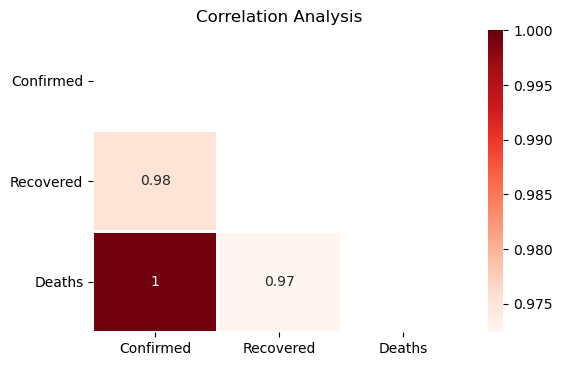

In [102]:
corr = covid_india[['Confirmed','Recovered','Deaths']].corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=1,linecolor='white',cmap='Reds')
plt.xticks(rotation=0)
plt.yticks(rotation = 0)
plt.show()

> We can see that there is strong correlation between confirmed cases, death and recovery.  But i think there might be causality. Let us check!!

# Granger Causality Tests

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In [103]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(covid_india[['Confirmed','Recovered']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.9697 , p=0.0000  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=61.0031 , p=0.0000  , df=1
likelihood ratio test: chi2=46.5742 , p=0.0000  , df=1
parameter F test:         F=58.9697 , p=0.0000  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=23.1418 , p=0.0000  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=49.0385 , p=0.0000  , df=2
likelihood ratio test: chi2=39.0618 , p=0.0000  , df=2
parameter F test:         F=23.1418 , p=0.0000  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.8307  , p=0.0000  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=32.0409 , p=0.0000  , df=3
likelihood ratio test: chi2=27.3236 , p=0.0000  , df=3
parameter F test:         F=9.8307  , p=0.0000  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.8401  , p=0.0004  , df_d

In [104]:
grangercausalitytests(covid_india[['Confirmed','Deaths']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5101  , p=0.0365  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=4.6656  , p=0.0308  , df=1
likelihood ratio test: chi2=4.5487  , p=0.0329  , df=1
parameter F test:         F=4.5101  , p=0.0365  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2204  , p=0.0449  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=6.8242  , p=0.0330  , df=2
likelihood ratio test: chi2=6.5752  , p=0.0373  , df=2
parameter F test:         F=3.2204  , p=0.0449  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5629  , p=0.0053  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=14.8717 , p=0.0019  , df=3
likelihood ratio test: chi2=13.7408 , p=0.0033  , df=3
parameter F test:         F=4.5629  , p=0.0053  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1668  , p=0.0182  , df_d

> In both cases we can see that p value is less than 0.05, So we can say that there must be third factor which is causing that strong correlation!!

## Well, I will end this notebook here only!! I have not done any Forecasting in this notebook, My main aim was to do some EDA and Reporting. I will forecast in my second notebook where i will be using RNN and Advance Arima Technique (auto_arima or SARIMA).

### Please do upvot if you like it :)